#### Import all the required modules

In [1]:
import numpy as np
import tensorflow as tf
import model as model
import matplotlib.pyplot as plt
from sklearn.decomposition import IncrementalPCA
%matplotlib inline

#### Load data into memory

In [2]:
images = np.load('X_aug.npy')
labels = np.load('y_aug.npy')
    
ratio = 0.7
X_train = images[:int(images.shape[0]*ratio)]
y_train = labels[:int(labels.shape[0]*ratio)]

X_test = images[int(images.shape[0]*ratio):]
y_test = labels[int(labels.shape[0]*ratio):]

#### VIsualize 5 malware binaries

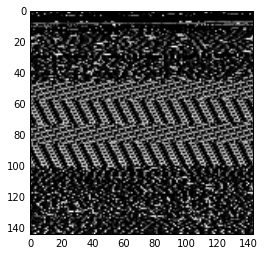

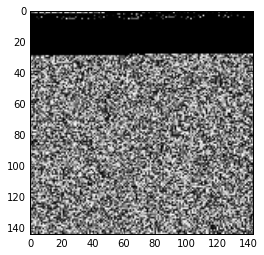

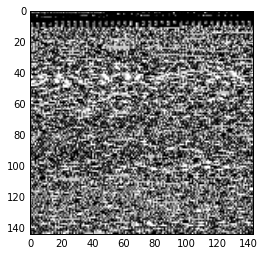

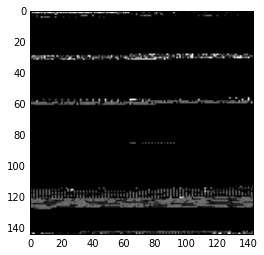

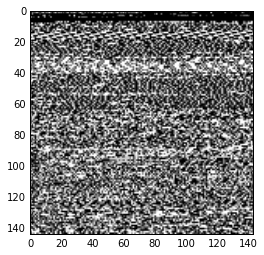

In [3]:
for i in range(5):
    plt.figure()
    plt.imshow(X_test[i].reshape(144,144), cmap="gray")

#### Perform standard normalization followed by application of principle component analysis 

In [4]:
X_mean = np.mean(X_train, axis=0)

X_train -= X_mean
X_test -= X_mean

X_std = np.std(X_train, axis=0)

X_train /= X_std
X_test /= X_std

ipca = IncrementalPCA(n_components=500, whiten=True)
ipca.fit(X_train)
X_train = ipca.transform(X_train)
X_test = ipca.transform(X_test)

#### Create *Tensorflow* placeholders to feed in the data

In [5]:
X = tf.placeholder(tf.float32, shape=(None, model.IMAGE_PIXELS))
y_ = tf.placeholder(tf.int32, shape=(None))
keep_prob = tf.placeholder(tf.float32)

logits = model.inference(X, 1000, 1000, 1000, 1000, keep_prob=1.0)

y = model.predict(logits)

init = tf.initialize_all_variables()

saver = tf.train.Saver()

In [6]:
sess = tf.InteractiveSession()

### Restore from previously trained checkpoint and make predictions

In [7]:
ckpt = tf.train.get_checkpoint_state('summary')
if ckpt and ckpt.model_checkpoint_path:
    saver.restore(sess, ckpt.model_checkpoint_path)
    
    predictions = sess.run(y, feed_dict={X:X_test, y_:y_test, keep_prob:1.0})

### Mean accuracy of the model

In [8]:
print "Accuracy: %.3f" % (100*np.mean(np.equal(predictions, y_test)))

Accuracy: 95.575
